In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

import re
from textblob import TextBlob
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#Read the data files
rev = pd.read_csv("C:/Users/USER/Desktop/Course_Data_Scientist_Springboard/1Project_E-commerce/Womens Clothing E-Commerce Reviews.csv", index_col=0)
rev_new = pd.read_csv("Reviews_new.csv", index_col=0)

## Visualizing features importances

We determine which features were the most predictive for rating according to the random forests regressor rf.
For this purpose, we draw a horizontal barplot of the feature importance as assessed by rf.

In [3]:
rev_new.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,char_length_RT,word_count_RT,avg_word,stopwords_len,spec_char,RT_new,sent,Sentiment
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53,8,5.750000,2,0,absolutely wonderful silky sexy comfortable,0.633333,Strong Positive
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303,67,3.822581,30,1,love dress sooo pretty happened store im glad ...,0.339583,Positive
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,98,4.112245,45,1,high hopes dress really wanted work initially ...,0.073675,Neutral
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124,22,4.681818,6,2,love love love jumpsuit fun flirty fabulous ti...,0.550000,Positive
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,36,4.361111,19,1,shirt flattering adjustable tie perfect length...,0.512891,Positive


#### Preprocessing

The first step to use machine learning technique and develop a prediction model is to preprocess the data.
Scikit-learn does not accept non-numerical features, so I need to create dummy variables and also to replace all NaN values. 

In [3]:
def pre_process_data(df): #, enforce_cols=None):
    print("Input shape:\t{}".format(df.shape))
        
        
    # create dummy variables for categoricals
    df = pd.get_dummies(df)
    print("After converting categoricals:\t{}".format(df.shape))
    
    #Handling missing data: replace all NaN elements with 0s
    df.fillna(0, inplace=True)
    
    return df

In [4]:
to_drop = ['Title', 'Review Text', 'RT_new']
df = rev_new.drop(to_drop, axis=1)

Input shape:	(22641, 14)
After converting categoricals:	(22641, 44)


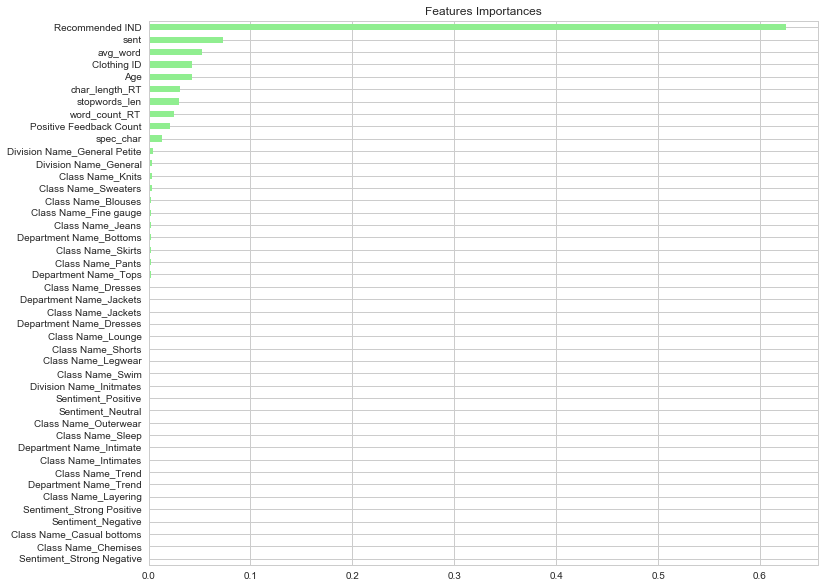

In [61]:
X = pre_process_data(df.drop('Rating', axis=1))
y = df.Rating 

#SEED = 1
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train)


# Predict the test set labels
y_pred = rf.predict(X_test)


# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_, index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.subplots(figsize=(12,10))
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
#plt.savefig('feature_selection.jpg', bbox_inches= 'tight')
plt.show()


As expected, the most importance feature to predict rating score is 'Recommeded IND'.

Now, we compare different models calculating the accuracy on training and test data. 

In [62]:
SEED = 1
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=SEED)

# Training our model: random forest classifier
#ran = RandomForestClassifier(n_estimators=50, random_state=0)
ran = RandomForestClassifier(n_estimators=40, max_depth=6, random_state=0)

# Fit the model to the training data
mod1 = ran.fit(X_train, y_train)

#Print the accuracy scores for the training and test sets
training_accuracy = ran.score(X_train, y_train)
test_accuracy = ran.score(X_test, y_test)
print ("Accuracy on training data: ", training_accuracy)
print ("Accuracy on test data: ", test_accuracy)


Accuracy on training data:  0.6326350328117113
Accuracy on test data:  0.6371264537023407


In [63]:
# Training our model:
log=LogisticRegression()

# Fit the model to the training data
mod = log.fit(X_train, y_train)

#Print the accuracy scores for the training and test sets
training_accuracy = log.score(X_train, y_train)
test_accuracy = log.score(X_test, y_test)
print ("Accuracy on training data: ", training_accuracy)
print ("Accuracy on test data: ", test_accuracy)

Accuracy on training data:  0.6267036850075719
Accuracy on test data:  0.6325629324304431


In [64]:
# Training our model:
svc=LinearSVC()

# Fit the model to the training data
mod3 = svc.fit(X_train, y_train)

#Print the accuracy scores for the training and test sets
training_accuracy = svc.score(X_train, y_train)
test_accuracy = svc.score(X_test, y_test)
print ("Accuracy on training data: ", training_accuracy)
print ("Accuracy on test data: ", test_accuracy)

Accuracy on training data:  0.48674911660777387
Accuracy on test data:  0.496687766818784


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

# Training our model
bag = BaggingClassifier(n_estimators=50, random_state=0)

# Fit the model to the training data
mod4 = bag.fit(X_train, y_train)

#Print the accuracy scores for the training sets
training_accuracy = bag.score(X_train, y_train)
test_accuracy = bag.score(X_test, y_test)
print ("Accuracy on training data: ", training_accuracy)
print ("Accuracy on test data: ", test_accuracy)


Accuracy on training data:  0.9998107016658253
Accuracy on test data:  0.6097453260709554


In [66]:
# Predict test set labels
predict = mod1.predict(X_test)
print (predict)

[5 5 5 ... 5 5 5]


In this case, the Random Forest is the best model to predict rating from all the features.

### Logistic Regression: Rating and Recommended IND

In [12]:
X = df['Recommended IND'].values.reshape(-1,1)
y = df['Rating'].values.reshape(-1,1)

# Split the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training our model
# Logistic Regression
log = LogisticRegression()
log.fit(X_train, y_train)

#Print the accuracy scores for the training and test sets
training_accuracy = log.score(X_train, y_train)
test_accuracy = log.score(X_test, y_test)
print ("Accuracy on training data: ", training_accuracy)
print ("Accuracy on test data: ", test_accuracy)


# Testing and evaluating our model

predicts = log.predict(X_test)

# Evaluate the predictions against actual ratings 


print ('Confusion Matrix')
print(confusion_matrix(y_test, predicts))
print('\n \n')
print ('        Classification Report')
print('\n ')
print(classification_report(y_test, predicts))

Accuracy on training data:  0.6210878344270571
Accuracy on test data:  0.636979243338731
Confusion Matrix
[[   0    0  221    0    6]
 [   0    0  429    0   33]
 [   0    0  541    0  333]
 [   0    0   50    0 1388]
 [   0    0    6    0 3786]]

 

        Classification Report

 
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       227
          2       0.00      0.00      0.00       462
          3       0.43      0.62      0.51       874
          4       0.00      0.00      0.00      1438
          5       0.68      1.00      0.81      3792

avg / total       0.44      0.64      0.52      6793



C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [14]:
clf = LogisticRegression()
score = cv_score(clf, X_train, y_train)
print(score)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

0.6210886416417722


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
log.predict_proba(X_test)

array([[0.0011114 , 0.00505431, 0.06456084, 0.25801537, 0.67125808],
       [0.0011114 , 0.00505431, 0.06456084, 0.25801537, 0.67125808],
       [0.0011114 , 0.00505431, 0.06456084, 0.25801537, 0.67125808],
       ...,
       [0.0011114 , 0.00505431, 0.06456084, 0.25801537, 0.67125808],
       [0.0011114 , 0.00505431, 0.06456084, 0.25801537, 0.67125808],
       [0.2031731 , 0.35739317, 0.38829064, 0.04169262, 0.00945047]])

####  From rating score can I predict if a cloth is recommended or not?

In [16]:
X = df['Rating'].values.reshape(-1,1)
y = df['Recommended IND'].values.reshape(-1,1)


# Split the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training our model
# Logistic Regression
log = LogisticRegression()
log.fit(X_train, y_train)

#Print the accuracy scores for the training and test sets
training_accuracy = log.score(X_train, y_train)
test_accuracy = log.score(X_test, y_test)
print ("Accuracy on training data: ", training_accuracy)
print ("Accuracy on test data: ", test_accuracy)


# Testing and evaluating our model

predicts = log.predict(X_test)


Accuracy on training data:  0.9345027763755679
Accuracy on test data:  0.936993964375092


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


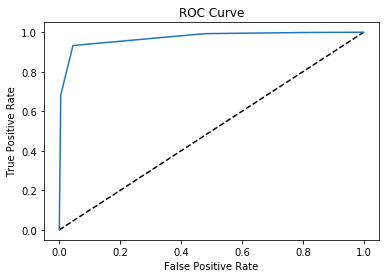

In [17]:
# Import necessary modules
from sklearn.metrics import roc_curve
# Compute predicted probabilities: y_pred_prob
y_pred_prob = log.predict_proba(X_test)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.savefig('ROC_curve.pdf', bbox_inches= 'tight')
plt.show()

In [18]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = log.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(log, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.9715568355759557


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

AUC scores computed using 5-fold cross-validation: [0.97171044 0.97616179 0.96992511 0.97225149 0.97001506]


In [19]:
test_no_rec=rev_new['Rating'][61]

log.predict(test_no_rec)[0]

0

In [20]:
test_rec=rev_new['Rating'][7]

log.predict(test_rec)[0]

1

We test the predict model and it is work well!

### Predict Rating from polarity score

In [21]:
X = df['sent'].values.reshape(-1,1)
y = df['Rating'].values.reshape(-1,1)


# Split the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training our model
# Logistic Regression
log = LogisticRegression()
log.fit(X_train, y_train)


#Print the accuracy scores for the training and test sets
training_accuracy = log.score(X_train, y_train)
test_accuracy = log.score(X_test, y_test)
print ("Accuracy on training data-LogisticRegression: ", training_accuracy)
print ("Accuracy on test data-LogisticRegression: ", test_accuracy)



print ('#################################################')

svc = LinearSVC()
svc.fit(X_train, y_train)

#Print the accuracy scores for the training and test sets
training_accuracy = svc.score(X_train, y_train)
test_accuracy = svc.score(X_test, y_test)
print ("Accuracy on training data-RandomForest: ", training_accuracy)
print ("Accuracy on test data-RandomForest: ", test_accuracy)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on training data-LogisticRegression:  0.555022715800101
Accuracy on test data-LogisticRegression:  0.5573384366259385
#################################################
Accuracy on training data-RandomForest:  0.5525618374558304
Accuracy on test data-RandomForest:  0.5577800677167672


In [22]:
# Testing and evaluating our model

predicts = log.predict(X_test)

log.predict_proba(X_test)


array([[0.01152603, 0.03043673, 0.07586201, 0.19327813, 0.68889711],
       [0.03025101, 0.06424722, 0.12649987, 0.23159401, 0.54740789],
       [0.09257716, 0.14614044, 0.21206257, 0.25981105, 0.28940878],
       ...,
       [0.0153786 , 0.03810259, 0.08858177, 0.20431026, 0.65362677],
       [0.03013797, 0.06406356, 0.12625674, 0.23144478, 0.54809696],
       [0.03360677, 0.0696157 , 0.13348414, 0.23573876, 0.52755463]])

### Predict rating from Positive Feedback Count

In [23]:
X = df['Positive Feedback Count'].values.reshape(-1,1)
y = df['Rating'].values.reshape(-1,1)


# Split the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training our model
# Logistic Regression
log = LogisticRegression()
log.fit(X_train, y_train)


#Print the accuracy scores for the training and test sets
training_accuracy = log.score(X_train, y_train)
test_accuracy = log.score(X_test, y_test)
print ("Accuracy on training data-LogisticRegression: ", training_accuracy)
print ("Accuracy on test data-LogisticRegression: ", test_accuracy)


# Testing and evaluating our model

predicts = log.predict(X_test)

print ('#################################################')

ran = RandomForestClassifier(n_estimators=40, max_depth=6)
ran.fit(X_train, y_train)

#Print the accuracy scores for the training and test sets
training_accuracy = ran.score(X_train, y_train)
test_accuracy = ran.score(X_test, y_test)
print ("Accuracy on training data-RandomForest: ", training_accuracy)
print ("Accuracy on test data-RandomForest: ", test_accuracy)

Accuracy on training data-LogisticRegression:  0.551678445229682
Accuracy on test data-LogisticRegression:  0.5582216988075961
#################################################


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy on training data-RandomForest:  0.5524987380111055
Accuracy on test data-RandomForest:  0.5582216988075961


### Predict Positive Feedback Count from Rating

In [24]:
X = df['Rating'].values.reshape(-1,1)
y = df['Positive Feedback Count'].values.reshape(-1,1)


# Split the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training our model
# Logistic Regression
log = LogisticRegression()
log.fit(X_train, y_train)


#Print the accuracy scores for the training and test sets
training_accuracy = log.score(X_train, y_train)
test_accuracy = log.score(X_test, y_test)
print ("Accuracy on training data-LogisticRegression: ", training_accuracy)
print ("Accuracy on test data-LogisticRegression: ", test_accuracy)


# Testing and evaluating our model

predicts = log.predict(X_test)

print ('#################################################')

ran = RandomForestClassifier(n_estimators=40, max_depth=6, random_state=0)
ran.fit(X_train, y_train)

#Print the accuracy scores for the training and test sets
training_accuracy = ran.score(X_train, y_train)
test_accuracy = ran.score(X_test, y_test)
print ("Accuracy on training data-RandomForest: ", training_accuracy)
print ("Accuracy on test data-RandomForest: ", test_accuracy)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on training data-LogisticRegression:  0.45469459868753154
Accuracy on test data-LogisticRegression:  0.4600323862799941
#################################################


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy on training data-RandomForest:  0.45469459868753154
Accuracy on test data-RandomForest:  0.4600323862799941


### Predict rating from Clothing ID 

In [25]:
X = rev_new['Clothing ID'].values.reshape(-1,1)
y = rev_new['Rating'].values.reshape(-1,1)

# Split the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training our model

ran = RandomForestClassifier(n_estimators=40, max_depth=6, random_state=0)
ran.fit(X_train, y_train)

#Print the accuracy scores for the training and test sets
training_accuracy = ran.score(X_train, y_train)
test_accuracy = ran.score(X_test, y_test)
print ("Accuracy on training data: ", training_accuracy)
print ("Accuracy on test data: ", test_accuracy)


# Testing and evaluating our model

predicts = ran.predict(X_test)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Accuracy on training data:  0.5519939424533065
Accuracy on test data:  0.5582216988075961


In [26]:
test_rec=rev_new['Clothing ID'][61]

ran.predict(test_rec)[0]

5

Not very good!

### Predict rating from age

In [27]:
X = rev_new['Age'].values.reshape(-1,1)
y = rev_new['Rating'].values.reshape(-1,1)

# Split the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training our model
RandomForestClassifier(n_estimators=50)
#log = LogisticRegression()
ran.fit(X_train, y_train)

#Print the accuracy scores for the training and test sets
training_accuracy = ran.score(X_train, y_train)
test_accuracy = ran.score(X_test, y_test)
print ("Accuracy on training data: ", training_accuracy)
print ("Accuracy on test data: ", test_accuracy)


# Testing and evaluating our model

predicts = ran.predict(X_test)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Accuracy on training data:  0.5520570418980313
Accuracy on test data:  0.5580744884439864


### Predict rating from special characters 

In [28]:
X = rev_new['spec_char'].values.reshape(-1,1)
y = rev_new['Rating'].values.reshape(-1,1)

# Split the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training our model
ran = RandomForestClassifier(n_estimators=50)
#log = LogisticRegression()
ran.fit(X_train, y_train)

#Print the accuracy scores for the training and test sets
training_accuracy = ran.score(X_train, y_train)
test_accuracy = ran.score(X_test, y_test)
print ("Accuracy on training data: ", training_accuracy)
print ("Accuracy on test data: ", test_accuracy)


# Testing and evaluating our model

predicts = ran.predict(X_test)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Accuracy on training data:  0.5519939424533065
Accuracy on test data:  0.5582216988075961


### Predict rating from Avg word  

In [29]:
X = rev_new['avg_word'].values.reshape(-1,1)
y = rev_new['Rating'].values.reshape(-1,1)

# Split the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training our model
ran = RandomForestClassifier(n_estimators=50)
#log = LogisticRegression()
ran.fit(X_train, y_train)

#Print the accuracy scores for the training and test sets
training_accuracy = ran.score(X_train, y_train)
test_accuracy = ran.score(X_test, y_test)
print ("Accuracy on training data: ", training_accuracy)
print ("Accuracy on test data: ", test_accuracy)


# Testing and evaluating our model

predicts = ran.predict(X_test)


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Accuracy on training data:  0.6150933871781928
Accuracy on test data:  0.49506845281907846


In [30]:
X = rev_new['avg_word'].values.reshape(-1,1)
y = rev_new['Rating'].values.reshape(-1,1)

# Split the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training our model
#ran = RandomForestClassifier(n_estimators=50)
log = LogisticRegression()

log.fit(X_train, y_train)

#Print the accuracy scores for the training and test sets
training_accuracy = log.score(X_train, y_train)
test_accuracy = log.score(X_test, y_test)
print ("Accuracy on training data: ", training_accuracy)
print ("Accuracy on test data: ", test_accuracy)


# Testing and evaluating our model

predicts = log.predict(X_test)

Accuracy on training data:  0.5519939424533065
Accuracy on test data:  0.5582216988075961


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


It's better the Logistic regression model because the random forest is overfitting

### Predict rating from Division Name

In [31]:
division_enc = pd.get_dummies(rev_new['Division Name'])

In [32]:
df_div = pd.concat([rev_new[['Rating']], division_enc], axis=1)

In [33]:
X = df_div[['Rating']]#.values.reshape(-1,1)
y = df_div.drop(['Rating'], axis=1) #.values.reshape(-1,1)

# Split the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training our model
ran = RandomForestClassifier(n_estimators=50)

ran.fit(X_train, y_train)

#Print the accuracy scores for the training and test sets
training_accuracy = ran.score(X_train, y_train)
test_accuracy = ran.score(X_test, y_test)
print ("Accuracy on training data: ", training_accuracy)
print ("Accuracy on test data: ", test_accuracy)


# Testing and evaluating our model

predicts = ran.predict(X_test)


Accuracy on training data:  0.5913679959616356
Accuracy on test data:  0.5878109818931253


## Text and rating and recommended items

In [5]:
# Instantiate the Word tokenizer & Word lemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# Define a word lemmatizer function
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

# Apply the word lemmatizer function to data
rev_new['Filtered_RT'] = rev_new['RT_new'].apply(lemmatize_text)
rev_new.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,char_length_RT,word_count_RT,avg_word,stopwords_len,spec_char,RT_new,sent,Sentiment,Filtered_RT
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53,8,5.750000,2,0,absolutely wonderful silky sexy comfortable,0.633333,Strong Positive,"[absolutely, wonderful, silky, sexy, comfortable]"
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303,67,3.822581,30,1,love dress sooo pretty happened store im glad ...,0.339583,Positive,"[love, dress, sooo, pretty, happened, store, i..."
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,98,4.112245,45,1,high hopes dress really wanted work initially ...,0.073675,Neutral,"[high, hope, dress, really, wanted, work, init..."
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124,22,4.681818,6,2,love love love jumpsuit fun flirty fabulous ti...,0.550000,Positive,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,36,4.361111,19,1,shirt flattering adjustable tie perfect length...,0.512891,Positive,"[shirt, flattering, adjustable, tie, perfect, ..."


In [6]:
# Getting a count of words from the documents
# Ngram_range is set to 1,2 - meaning either single or two word combination will be extracted
cvec = CountVectorizer(min_df=.04, max_df=.9, ngram_range=(1,2), tokenizer=lambda doc: doc, lowercase=False)
cvec.fit(rev_new['Filtered_RT'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=0.9, max_features=None, min_df=0.04,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function <lambda> at 0x0000028135036378>,
        vocabulary=None)

In [7]:
# Creating the bag-of-words representation
cvec_counts = cvec.transform(rev_new['Filtered_RT'])
print('sparse matrix shape:', cvec_counts.shape)

sparse matrix shape: (22641, 124)


In [8]:
# Instantiating the TfidfTransformer
transformer = TfidfTransformer()

# Fitting and transforming n-grams
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights

<22641x124 sparse matrix of type '<class 'numpy.float64'>'
	with 252415 stored elements in Compressed Sparse Row format>

In [9]:
# Getting a list of all n-grams
transformed_weights = transformed_weights.toarray()
vocab = cvec.get_feature_names()

# Putting weighted n-grams into a DataFrame and computing some summary statistics
model_text = pd.DataFrame(transformed_weights, columns=vocab)
model_text['Keyword'] = model_text.idxmax(axis=1)
model_text['Max'] = model_text.max(axis=1)
model_text['Sum'] = model_text.drop('Max', axis=1).sum(axis=1)
model_text.head(10)

,arm,beautiful,better,big,bit,black,blue,body,bought,casual,...,wear,wearing,went,white,work,worn,x,Keyword,Max,Sum
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,comfortable,1.000000,1.000000
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.19417,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,petite,0.644406,3.466632
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.0,0.206939,0.0,0.000000,small,0.533009,3.519209
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.262051,0.0,0.000000,0.0,0.000000,0.0,0.000000,love,0.692527,2.094841
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.237029,0.0,0.000000,0.0,0.000000,0.0,0.000000,shirt,0.677628,2.435643
5,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.137975,0.0,0.000000,0.0,0.189047,0.0,0.000000,dress,0.525018,3.554618
6,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.322056,0.0,0.000000,0.0,0.272283,color,0.359226,3.660509
7,0.0,0.0,0.0,0.175721,0.310362,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.409486,0.0,0.000000,0.0,0.000000,went,0.409486,4.073674
8,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.354842,style,0.365140,3.264694
9,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.142733,0.0,0.000000,0.0,0.195566,0.0,0.210837,petite,0.413165,4.308047


In [10]:
# Merging td-idf weight matrix with original DataFrame
df_text_rec = pd.concat([rev_new[['Recommended IND']], model_text], axis=1)
df_text = pd.concat([rev_new[['Rating']], model_text], axis=1)
df_text.head()

,Rating,arm,beautiful,better,big,bit,black,blue,body,bought,...,wear,wearing,went,white,work,worn,x,Keyword,Max,Sum
0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,comfortable,1.000000,1.000000
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.19417,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,petite,0.644406,3.466632
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.206939,0.0,0.0,small,0.533009,3.519209
3,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.262051,0.0,0.0,0.0,0.000000,0.0,0.0,love,0.692527,2.094841
4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.237029,0.0,0.0,0.0,0.000000,0.0,0.0,shirt,0.677628,2.435643


In [11]:
to_drop = ['Keyword', 'Max', 'Sum']

df_dropped = df_text.drop(to_drop, axis=1)
df_dropped_rec = df_text_rec.drop(to_drop, axis=1)

df_dropped=df_dropped.dropna(0)
df_dropped_rec=df_dropped_rec.dropna(0)

In [74]:
X = df_dropped.drop('Rating', axis=1)
y = df_dropped['Rating']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

ran = RandomForestClassifier(n_estimators=50)
ran.fit(X_train, y_train)


# Compile arrays of columns (words) and feature importances
fi = {'Words':df_dropped.drop('Rating',axis=1).columns.tolist(),'Importance':ran.feature_importances_}

# Bung these into a dataframe, rank highest to lowest then slice top 20
Importance = pd.DataFrame(fi,index=None).sort_values('Importance',ascending=False).head(25)


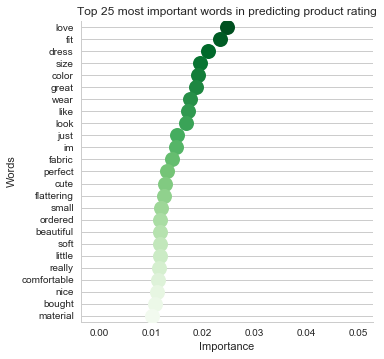

In [75]:
# Plot the graph!
titles = ["Top 25 most important words in predicting product rating"]


sns.set(style="whitegrid")
ft = sns.PairGrid(Importance,y_vars='Words',x_vars='Importance',size=5,aspect=1)
ft.map(sns.stripplot,orient='h',palette='Greens_r', edgecolor="black",size=15)
for ax, title in zip(ft.axes.flat, titles):
        
    # Set a different title for each axes
    ax.set(title=title)
        
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
#plt.savefig('Most_importance_words.jpg', bbox_inches='tight')
plt.show()


In [43]:
#Random Forest model
X = df_dropped.drop('Rating', axis=1)
y = df_dropped['Rating']


# Split the dataset 
train_X, test_X, train_y, test_y = train_test_split(X, y)

ran = RandomForestClassifier(n_estimators=40, max_depth=6)

# Fit the model to the training data
ran.fit(train_X, train_y)

#Print the accuracy scores for the training and test sets
training_accuracy = ran.score(train_X, train_y)
test_accuracy = ran.score(test_X, test_y)
print ("Accuracy on training data: ", training_accuracy)
print ("Accuracy on test data: ", test_accuracy)

Accuracy on training data:  0.5565876313859692
Accuracy on test data:  0.5510540788267644


In [44]:
X = df_dropped_rec.drop('Recommended IND', axis=1)
y = df_dropped_rec['Recommended IND']

train_X, test_X, train_y, test_y = train_test_split(X, y)

ran =RandomForestClassifier(n_estimators=40, max_depth=6)
# Fit the model to the training data
model = ran.fit(train_X, train_y)

#Print the accuracy scores for the training and test sets
training_accuracy = ran.score(train_X, train_y)
test_accuracy = ran.score(test_X, test_y)
print ("Accuracy on training data: ", training_accuracy)
print ("Accuracy on test data: ", test_accuracy)


Accuracy on training data:  0.8182595942312393
Accuracy on test data:  0.8212648945921174


In [45]:
#Multinomial Naive Bayes model
X = df_dropped.drop('Rating', axis=1)
y = df_dropped['Rating']


# Split the dataset 
train_X, test_X, train_y, test_y = train_test_split(X, y)

nb = MultinomialNB()
# Fit the model to the training data
nb.fit(train_X, train_y)

#Print the accuracy scores for the training and test sets
training_accuracy = nb.score(train_X, train_y)
test_accuracy = nb.score(test_X, test_y)
print ("Accuracy on training data: ", training_accuracy)
print ("Accuracy on test data: ", test_accuracy)


Accuracy on training data:  0.5549376680518211
Accuracy on test data:  0.5560036663611365


In [46]:
X = df_dropped_rec.drop('Recommended IND', axis=1)
y = df_dropped_rec['Recommended IND']

train_X, test_X, train_y, test_y = train_test_split(X, y)

nb = MultinomialNB()
# Fit the model to the training data
model = nb.fit(train_X, train_y)

#Print the accuracy scores for the training and test sets
training_accuracy = nb.score(train_X, train_y)
test_accuracy = nb.score(test_X, test_y)
print ("Accuracy on training data: ", training_accuracy)
print ("Accuracy on test data: ", test_accuracy)


Accuracy on training data:  0.8182595942312393
Accuracy on test data:  0.8212648945921174


#### Using Multinomial Bayes Algorithm to predict:
#### - which product has rating 5 and which 1;
#### - which product is recommended and which not.

In [47]:
import string
def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [48]:
rev_new=rev_new.dropna(axis=0,how='any')
rating_class = rev_new[(rev_new['Rating'] == 1) | (rev_new['Rating'] == 5)]
X_review=rating_class['Review Text']
y=rating_class['Rating']

In [49]:
transformer=CountVectorizer(analyzer=text_process)
X = transformer.fit_transform(X_review)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

nb = MultinomialNB()
nb.fit(X_train, y_train)

predict=nb.predict(X_test)

print(confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

[[  63  126]
 [  11 3249]]


             precision    recall  f1-score   support

          1       0.85      0.33      0.48       189
          5       0.96      1.00      0.98      3260

avg / total       0.96      0.96      0.95      3449



It is a great result: 96% of accuracy. We test now

In [51]:
test=rev_new['Review Text'][3]
print (test)
rev_new.iloc[1:2,:]

I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,char_length_RT,word_count_RT,avg_word,stopwords_len,spec_char,RT_new,sent,Sentiment,Filtered_RT
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124,22,4.681818,6,2,love love love jumpsuit fun flirty fabulous ti...,0.55,Positive,"[love, love, love, jumpsuit, fun, flirty, fabu..."


In [52]:
test_transformed = transformer.transform([test])
nb.predict(test_transformed)[0]

5

RIGHT! Now test negative one.

In [53]:
print (rev_new[rev_new['Rating'] == 1].head())

     Clothing ID  Age                        Title  \
61           368   36                   Itchy tags   
97           861   44                         Huge   
110          861   44                 Poor quality   
161          829   52  Scratchy, uncomfortable top   
214         1020   67             Not as pictured!   

                                           Review Text  Rating  \
61   3 tags sewn in, 2 small (about 1'' long) and 1...       1   
97   I was very excited to order this top in red xs...       1   
110  This is so thin and poor quality. especially f...       1   
161  The title says it all....this fabric of this t...       1   
214  The skirt that i received had very little blue...       1   

     Recommended IND  Positive Feedback Count   Division Name Department Name  \
61                 0                        0       Initmates        Intimate   
97                 0                        0  General Petite            Tops   
110                0               

In [54]:
test_neg=rev_new['Review Text'][61]
test_neg

"3 tags sewn in, 2 small (about 1'' long) and 1 huge (about 2'' x 3''). very itchy so i cut them out. then the thread left behind was plasticy and even more itchy! how can you make an intimates item with such itchy tags? not comfortable at all! also - i love bralettes and wear them all the time including to work. i am a b cup. however, this one is so thin and flimsy that it gives no support even to a b cup - so for me this would only be a lounging bralette - if it wasn't so itchy!"

In [55]:
test_neg_transformed = transformer.transform([test_neg])
nb.predict(test_neg_transformed)[0]

1

RIGHT! Our predict model works

Now, Recommended or not

In [76]:
X_rec=rev_new['Review Text']
y_rec=rev_new['Recommended IND']

transformer=CountVectorizer(analyzer=text_process)

X = transformer.fit_transform(X_rec)

X_train, X_test, y_train, y_test = train_test_split(X, y_rec, test_size=0.3, random_state=101)

nb = MultinomialNB()
nb.fit(X_train, y_train)

predict_recommendation=nb.predict(X_test)


print(confusion_matrix(y_test, predict_recommendation))
print('\n')
print(classification_report(y_test, predict_recommendation))


[[ 736  486]
 [ 280 5291]]


             precision    recall  f1-score   support

          0       0.72      0.60      0.66      1222
          1       0.92      0.95      0.93      5571

avg / total       0.88      0.89      0.88      6793



In [77]:
test_rec=rev_new['Review Text'][3]

test_transformed = transformer.transform([test_rec])
nb.predict(test_transformed)[0]

1

In [78]:
test_no_rec=rev_new['Review Text'][61]

test_transformed = transformer.transform([test_no_rec])
nb.predict(test_transformed)[0]

0

RIGHT! The predict model works well!!!

### Do the text features help the performance of a model?

In [12]:
df_new = pre_process_data(df)


Input shape:	(22641, 15)
After converting categoricals:	(22641, 45)


In [13]:
model_text.shape

(22641, 127)

In [14]:
model_tot = pd.concat([df_new, model_text], axis=1)

model_tot = model_tot.fillna(0)

to_drop = ['Keyword', 'Max', 'Sum']
model_tot_dropped = model_tot.drop(to_drop, axis=1)
model_tot_dropped.head()



,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,char_length_RT,word_count_RT,avg_word,stopwords_len,spec_char,...,want,wanted,way,wear,wearing,went,white,work,worn,x
0,767.0,33.0,4.0,1.0,0.0,53.0,8.0,5.750000,2.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,1080.0,34.0,5.0,1.0,4.0,303.0,67.0,3.822581,30.0,1.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,1077.0,60.0,3.0,0.0,0.0,500.0,98.0,4.112245,45.0,1.0,...,0.0,0.258447,0.0,0.000000,0.0,0.0,0.0,0.206939,0.0,0.0
3,1049.0,50.0,5.0,1.0,0.0,124.0,22.0,4.681818,6.0,2.0,...,0.0,0.000000,0.0,0.262051,0.0,0.0,0.0,0.000000,0.0,0.0
4,847.0,47.0,5.0,1.0,6.0,192.0,36.0,4.361111,19.0,1.0,...,0.0,0.000000,0.0,0.237029,0.0,0.0,0.0,0.000000,0.0,0.0


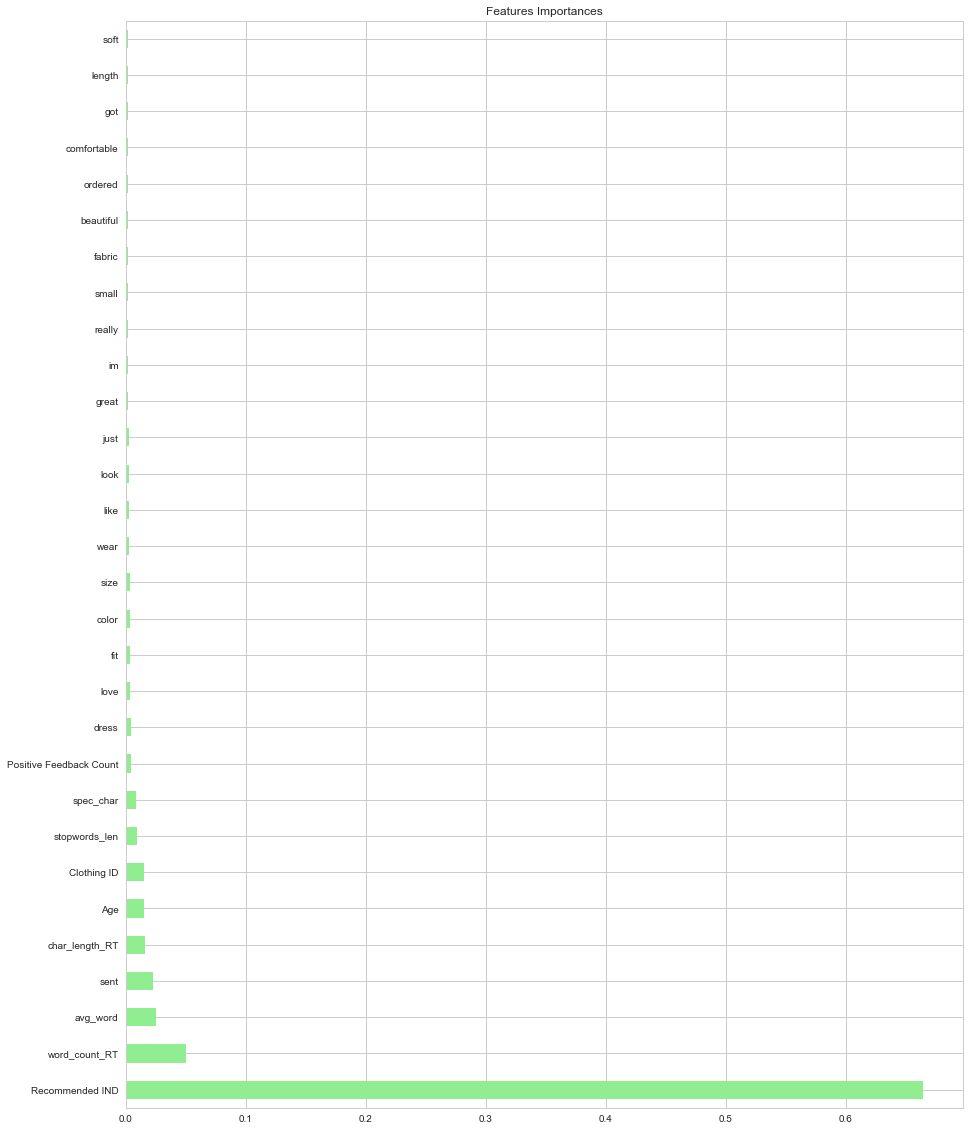

In [105]:
X = model_tot_dropped.drop('Rating', axis=1)
y = model_tot_dropped.Rating 

#SEED = 1
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train)


# Predict the test set labels
y_pred = rf.predict(X_test)


# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_, index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.subplots(figsize=(15,20))
importances.nlargest(30).plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.savefig('feature_selection_total.jpg', bbox_inches= 'tight')
plt.show()




In [125]:
X = model_tot_dropped.drop('Rating', axis=1)
y = model_tot_dropped.Rating 

SEED = 1
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=SEED)


# Training our model: random forest classifier
#ran = RandomForestClassifier(n_estimators=50, random_state=0)
ran = RandomForestClassifier(n_estimators=150, max_depth=13, min_samples_split=5, min_samples_leaf=1, max_leaf_nodes=85)

# Fit the model to the training data
mod1 = ran.fit(X_train, y_train)

#Print the accuracy scores for the training and test sets
training_accuracy = ran.score(X_train, y_train)
test_accuracy = ran.score(X_test, y_test)
print ("Accuracy on training data: ", training_accuracy)
print ("Accuracy on test data: ", test_accuracy)


Accuracy on training data:  0.6547126156843643
Accuracy on test data:  0.615428327887484


It seems that the text features don't improve the model to predict the rating.

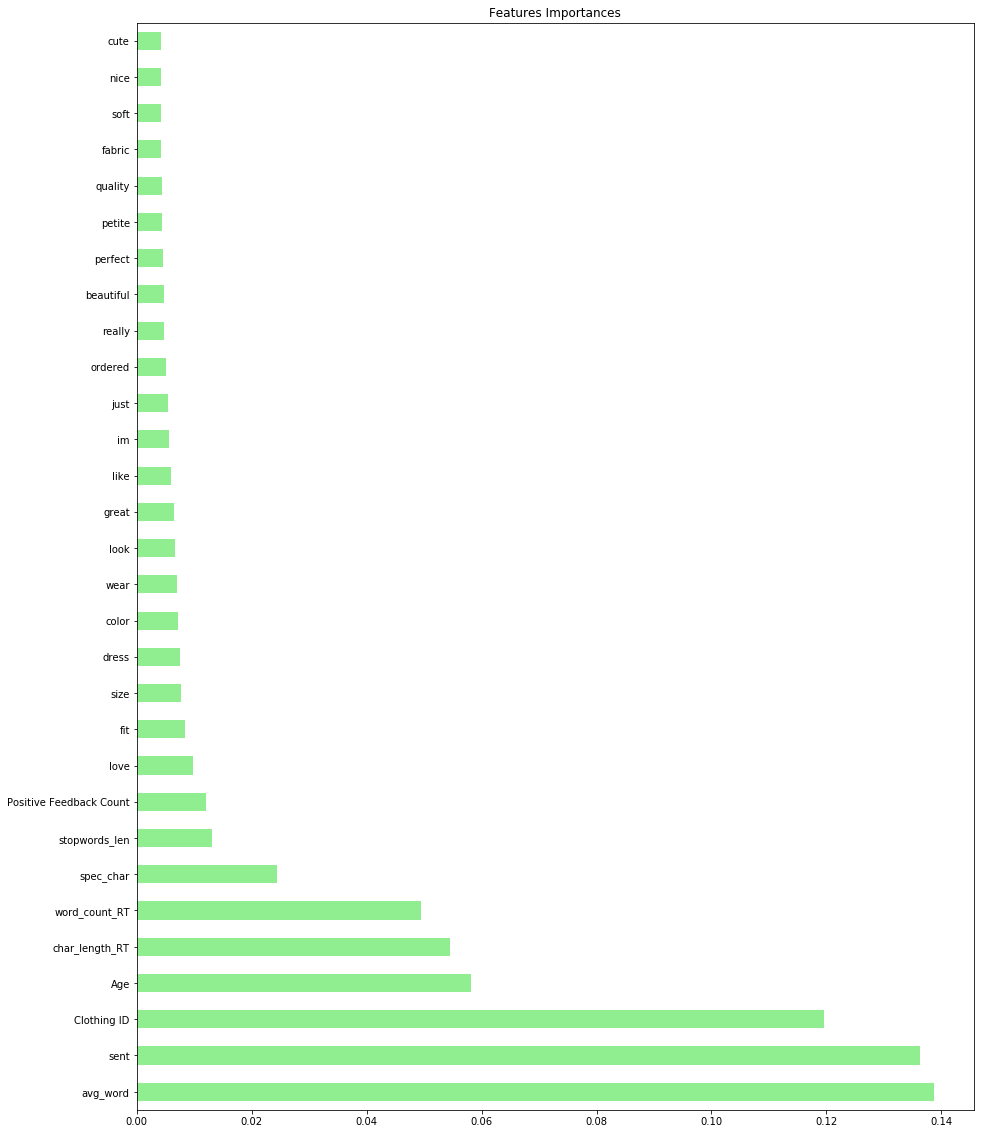

In [15]:
to_drop = ['Recommended IND']
new_model_tot = model_tot_dropped.drop(to_drop, axis=1)



X = new_model_tot.drop('Rating', axis=1)
y = new_model_tot.Rating 

#SEED = 1
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=1000,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train)


# Predict the test set labels
y_pred = rf.predict(X_test)


# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_, index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.subplots(figsize=(15,20))
importances.nlargest(30).plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.savefig('feature_selection_total_withoutRec.jpg', bbox_inches= 'tight')
plt.show()


In [16]:
X = new_model_tot.drop('Rating', axis=1)
y = new_model_tot.Rating 

SEED = 1
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=SEED)


# Training our model: random forest classifier
#ran = RandomForestClassifier(n_estimators=50, random_state=0)
ran = RandomForestClassifier(n_estimators=1000, max_depth=13, min_samples_split=5, min_samples_leaf=1, max_leaf_nodes=85)

# Fit the model to the training data
mod1 = ran.fit(X_train, y_train)

#Print the accuracy scores for the training and test sets
training_accuracy = ran.score(X_train, y_train)
test_accuracy = ran.score(X_test, y_test)
print ("Accuracy on training data: ", training_accuracy)
print ("Accuracy on test data: ", test_accuracy)


Accuracy on training data:  0.5793960058451048
Accuracy on test data:  0.553345645688308
